# <center>  Projet energy </center>

# Introduction

Le but de ce projet est de prévoir la performance énergétique des bâtiments à l’aide de méthodes de Machine Learning. Nous disposons pour ce faire d’un jeu de données avec des variables qui rendent compte des caractéristiques des bâtiments. Le tableau ci-dessous résume les neuf variables et leur signification. 
La variable Energy permet de quantifier la performance énergétique, c’est donc elle que nous cherchons à prédire. Nous introduisons de plus, la variable Energy efficiency dont ses modalités (A,B,C,D,E,F,G) sont obtenues à partir de Energy et des seuils 30,35,45,55,65,75. A travers différentes analyses nous allons essayer de comprendre ces variables et leurs différentes corrélations.

Nous considérons dans un premier temps un problème de classification : nous voulons prédire pour une observation donnée à quelle modalité elle appartient (A,B,C,D,E,F,G). Ensuite, nous considérons un problème de régression : prédire la variable Energy pour une observation, et utilisés les seuils 30,35,45,55,65,75 pour attribuer pour chacune leur efficacité énergétique. La mise en place de ces deux méthodes, nous permettra d’observer, pour ce sujet, quelle méthode permet d’obtenir les meilleurs résultats. 

Pour ce faire, nous testons différentes méthodes d’apprentissage : la régression logistique, les forêts aléatoires, les méthodes de Boosting, les noyaux SVM. 

# Importation des données

In [1]:
# pour faire des modèles statistiques ( sa forme abrégée pour l'appeler comme une fonction)
import statsmodels as stat 
# https://seaborn.pydata.org Seaborn is a Python data visualization library based on matplotlib. 
# It provides a high-level interface for drawing attractive and informative statistical graphics.
import seaborn  as sbrn 
# pour implementer des fonctions R 
import pandas  as pd
# pour mettre en place des graphiques / pyplot c 'est le module dédiée 
import matplotlib.pyplot as plt
# c 'est pour les traitements de facon generale 
import numpy as np
#courbes ROC ABC DEFG sinon compare les accuracy taux de mauvaise classification ajusté ajusted missclassification, tables de contingence

In [2]:
df=pd.read_csv("DataEnergy.csv")
df.loc [~ (df ["Glazing.area"]>0), "Glazing.area"] = 0 #passent les valeurs négatives en positives
print(df)

     Relative.compactness  Surface.area   Wall.area   Roof.area  \
0                0.982928    530.489958  306.484593  112.002683   
1                0.983547    519.872380  299.776324  110.048028   
2                0.979453    516.191221  303.374358  106.408431   
3                0.977733    518.924089  292.812213  113.055938   
4                0.903029    552.968920  316.236102  118.366409   
..                    ...           ...         ...         ...   
763              0.643870    790.290262  348.780889  220.754687   
764              0.619200    809.375965  368.120488  220.627738   
765              0.624317    813.327318  372.006715  220.660302   
766              0.624847    808.717739  367.865290  220.426225   
767              0.623071    806.664478  365.116238  220.774120   

     Overall.height orientation  Glazing.area  Glazing.area.distr     Energy  \
0               7.0       North      0.016095                   0  34.263943   
1               7.0        East    

Toute les valeurs négatives de glazing area sont mises a 0.

Le jeu de donnée se compose de 10 colonnes. Plus précisment, on peut utiliser 8 variables explicatives. 

In [3]:
df.head()

Relative.compactness  Surface.area   Wall.area   Roof.area  Overall.height  \
0              0.982928    530.489958  306.484593  112.002683             7.0   
1              0.983547    519.872380  299.776324  110.048028             7.0   
2              0.979453    516.191221  303.374358  106.408431             7.0   
3              0.977733    518.924089  292.812213  113.055938             7.0   
4              0.903029    552.968920  316.236102  118.366409             7.0   

  orientation  Glazing.area  Glazing.area.distr     Energy Energy.efficiency  
0       North      0.016095                   0  34.263943                 B  
1        East      0.000000                   0  34.589751                 B  
2       South      0.000000                   0  38.778048                 C  
3        West      0.000010                   0  37.947808                 C  
4       North      0.000000                   0  47.675859                 D

In [4]:
df.dtypes

Relative.compactness    float64
Surface.area            float64
Wall.area               float64
Roof.area               float64
Overall.height          float64
orientation              object
Glazing.area            float64
Glazing.area.distr        int64
Energy                  float64
Energy.efficiency        object
dtype: object

In [5]:
df["orientation"]=pd.Categorical(df["orientation"],ordered=False)
df["Energy.efficiency"]=pd.Categorical(df["Energy.efficiency"],ordered=False)
df["Glazing.area.distr"]=pd.Categorical(df["Glazing.area.distr"],ordered=False)
df["Overall.height"]=pd.Categorical(df["Overall.height"],ordered=True)
df.dtypes

Relative.compactness     float64
Surface.area             float64
Wall.area                float64
Roof.area                float64
Overall.height          category
orientation             category
Glazing.area             float64
Glazing.area.distr      category
Energy                   float64
Energy.efficiency       category
dtype: object

In [6]:
df.describe()

Relative.compactness  Surface.area   Wall.area   Roof.area  \
count            768.000000    768.000000  768.000000  768.000000   
mean               0.764511    671.349569  318.331811  176.508879   
std                0.105914     88.216217   43.942031   45.206368   
min                0.612496    501.450033  234.338121  105.338876   
25%                0.677856    598.684672  291.800051  137.385287   
50%                0.751687    673.069405  315.761457  183.308441   
75%                0.835044    744.594128  342.981089  220.510532   
max                0.991210    825.950839  425.805165  225.757721   

       Glazing.area      Energy  
count    768.000000  768.000000  
mean       0.234548   46.923575  
std        0.132780   19.863003  
min        0.000000   10.211493  
25%        0.103055   29.360416  
50%        0.247521   41.761247  
75%        0.391185   64.327196  
max        0.427021   94.842601

In [7]:
df.isnull().sum() #pas de valeurs nulles

Relative.compactness    0
Surface.area            0
Wall.area               0
Roof.area               0
Overall.height          0
orientation             0
Glazing.area            0
Glazing.area.distr      0
Energy                  0
Energy.efficiency       0
dtype: int64

# Analyse unidimensionnelle

On observe la distribution de chacune des variables explicatives. 

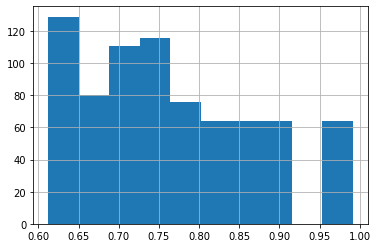

In [8]:
df["Relative.compactness"].hist()
plt.show()

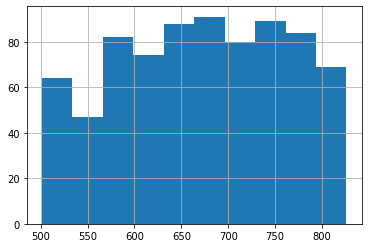

In [9]:
df["Surface.area"].hist()
plt.show()

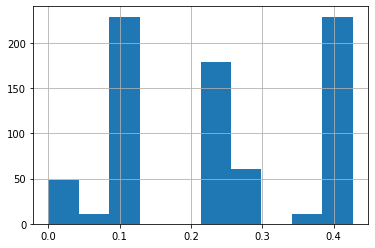

In [10]:
df["Glazing.area"].hist()
plt.show()

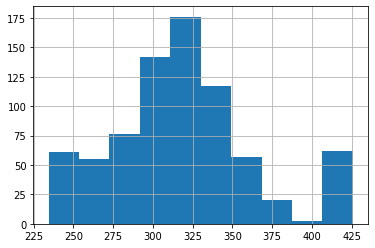

In [11]:
df["Wall.area"].hist()
plt.show()

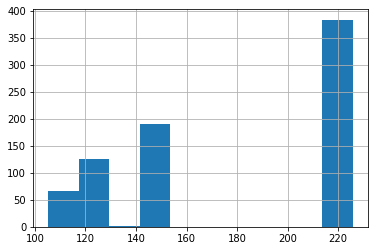

In [12]:
df["Roof.area"].hist()
plt.show()

On observe que roof.area n'a pas de distribution homogène.

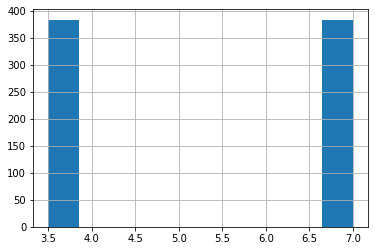

In [13]:
df["Overall.height"].hist()
plt.show()

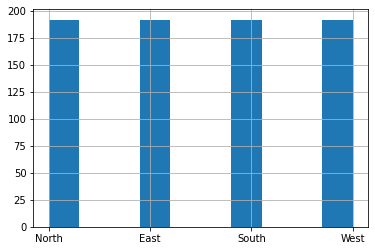

In [14]:
df["orientation"].hist()
plt.show()

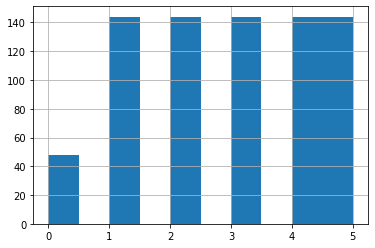

In [15]:
df["Glazing.area.distr"].hist()
plt.show()

On observe que glazing area, orientation, overall height sont des catégories. On peut donc les vectoriser.

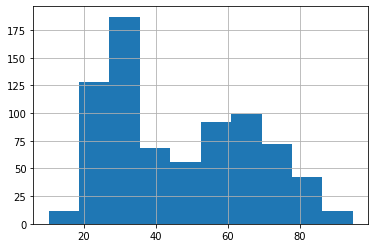

In [16]:
df["Energy"].hist()
plt.show()

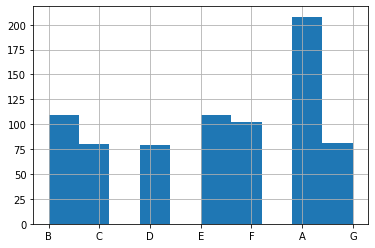

In [17]:
df["Energy.efficiency"].hist()
plt.show()

De même energy efficiency est organisé en catégorie, il peut donc être vectorisé. 

# Analyse multidimensionnelle

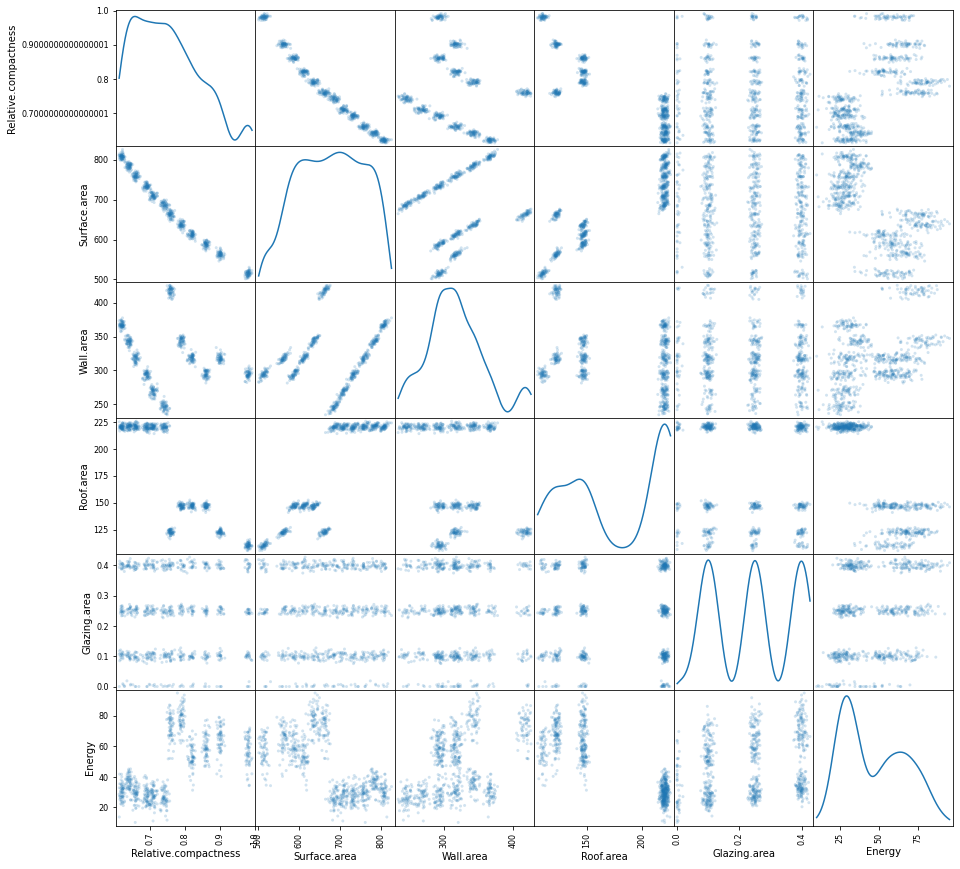

In [18]:
# scatter plot matrix des variables quantitatives
from pandas.plotting import scatter_matrix
scatter_matrix(df[["Relative.compactness","Surface.area","Wall.area","Roof.area","Glazing.area","Energy"]], alpha=0.2, figsize=(15, 15), diagonal='kde')
plt.show()

Ici, on observe des correlations avec surface area et relative compactness.

On observe maintenant plus précisement les corrélation entre wall area, roof area et surface area.

In [19]:
import plotly.express as px
fig = px.scatter_3d(df, x='Wall.area', y='Roof.area', z='Surface.area')
fig.show()

Grâce à cette visualisation on comprend que Surface.area = 2 x Roof.area + Wall.area. On décide donc de supprimer roof area au vu de sa distribution hétérogène. On retrouve plus précisement sur la matrice suivante ces corrélations.

<AxesSubplot:>

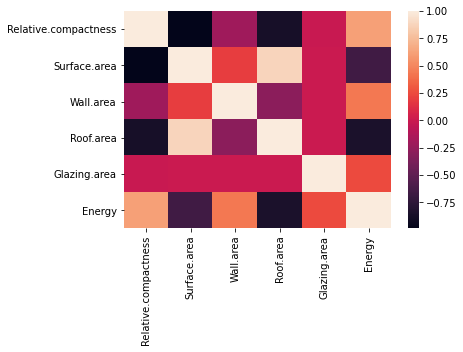

In [20]:
sbrn.heatmap(df.corr())

In [21]:
#Redondance des surfaces nous modifions le df pour enlever l'aire du plafond
df1=df.drop(['Roof.area'], axis='columns')

### Analyse univariée et bivariée des variables qualitatives

<AxesSubplot:ylabel='Overall.height'>

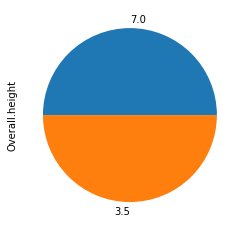

In [22]:
df1["Overall.height"].value_counts(normalize=True).plot(kind='pie')

<AxesSubplot:ylabel='orientation'>

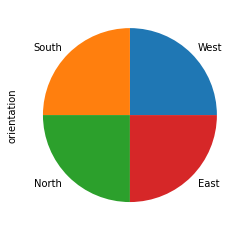

In [23]:
df1["orientation"].value_counts(normalize=True).plot(kind='pie')

<AxesSubplot:ylabel='Glazing.area.distr'>

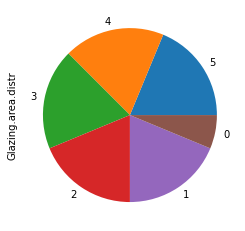

In [24]:
df1["Glazing.area.distr"].value_counts(normalize=True).plot(kind='pie')

<AxesSubplot:ylabel='Energy.efficiency'>

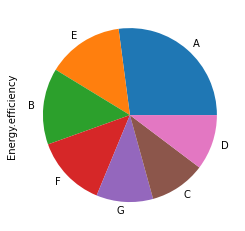

In [25]:
df1["Energy.efficiency"].value_counts(normalize=True).plot(kind='pie')

On remarque que la catégorie A est la plus présente pour Energy efficiency. Pour overall height, la répartition entre 3.5 et 7 est équilibrée. Il y a peu de catégorie 0 dans glazing area, donc peu de bâtiments sans fenêtre. Les orientations sont également réparties de manière identique.

(<Figure size 432x288 with 3 Axes>,
 {('0', 'B'): (0.0, 0.0, 0.06097560975609757, 0.08169934640522875),
  ('0', 'C'): (0.0,
   0.0849673202614379,
   0.06097560975609757,
   0.14297385620915032),
  ('0', 'D'): (0.0,
   0.23120915032679737,
   0.06097560975609757,
   0.1633986928104575),
  ('0', 'E'): (0.0,
   0.397875816993464,
   0.06097560975609757,
   0.08169934640522879),
  ('0', 'F'): (0.0,
   0.48284313725490197,
   0.06097560975609757,
   0.020424836601307172),
  ('0', 'A'): (0.0,
   0.5065359477124184,
   0.06097560975609757,
   0.49019607843137253),
  ('0', 'G'): (0.0, 1.0, 0.06097560975609757, 0.0),
  ('1', 'B'): (0.06585365853658538,
   0.0,
   0.1829268292682927,
   0.13616557734204793),
  ('1', 'C'): (0.06585365853658538,
   0.13943355119825707,
   0.1829268292682927,
   0.12254901960784313),
  ('1', 'D'): (0.06585365853658538,
   0.26525054466230935,
   0.1829268292682927,
   0.08169934640522875),
  ('1', 'E'): (0.06585365853658538,
   0.3502178649237473,
   0.18292682926

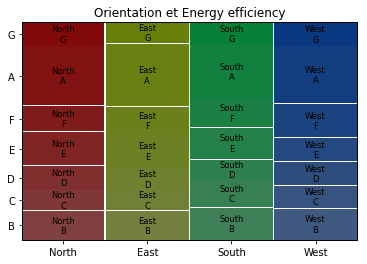

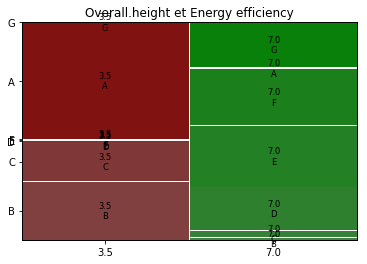

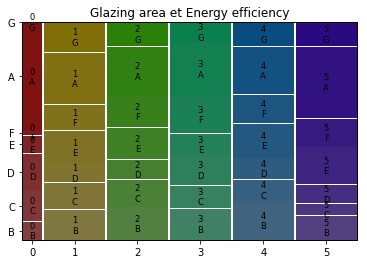

In [148]:
from statsmodels.graphics.mosaicplot import mosaic
mosaic(df1, ['orientation', 'Energy.efficiency'], title='Orientation et Energy efficiency')
mosaic(df1, ['Overall.height', 'Energy.efficiency'], title='Overall.height et Energy efficiency')
mosaic(df1, ['Glazing.area.distr', 'Energy.efficiency'], title='Glazing area et Energy efficiency')

On remarque une légère corrélation mais peu significative entre Energy efficiency et Orientation. Puis, une forte corrélation de Energy efficiency avec hauteur totale : pour les classes A,B,C c'est principalement la hauteur 3.5 alors que pour D,E,F,G c'est la hauteur 7. Enfin, il y a corrélation aussi entre energy efficiency et glazing area distr nottement avec la classe 0 qui semble avoir une forte proportion de A.

### Analyse bivariée variables quantitatives et qualitatives

C:\Users\camil\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



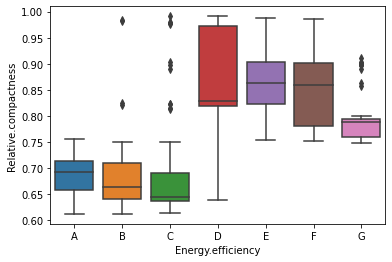

In [27]:
x=df1["Energy.efficiency"]
y=df1["Relative.compactness"]

ax = sbrn.boxplot(x, y, data=df1)

C:\Users\camil\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



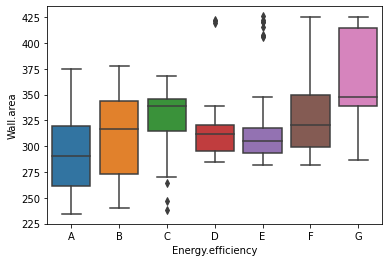

In [28]:
x=df1["Energy.efficiency"]
y=df1["Wall.area"]

ax = sbrn.boxplot(x, y, data=df1)

C:\Users\camil\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



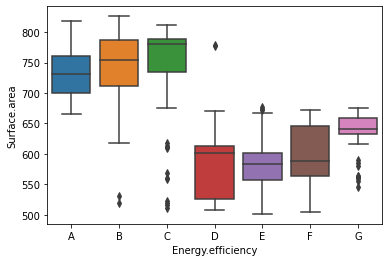

In [29]:
x=df1["Energy.efficiency"]
y=df1["Surface.area"]

ax = sbrn.boxplot(x, y, data=df1)

C:\Users\camil\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



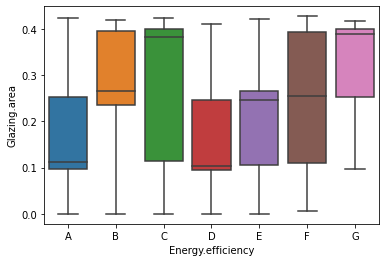

In [30]:
x=df1["Energy.efficiency"]
y=df1["Glazing.area"]

ax = sbrn.boxplot(x, y, data=df1)

Entre energy efficiency et compactness, on retrouve un grand écart entre les 1eres classes et dernieres classes, et de même entre energy efficiency et surface area. On observe également une legere corrélation avec wall area où la moyenne est un peu plus basse sur 1eres classes. Enfin, pour glazing area on observe une grande disparité.

Cette première analyse nous a permis de corriger le jeu de données. 

# PCA

In [31]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
# réduction des variables
X=scale(df1[["Relative.compactness","Wall.area","Surface.area","Overall.height","Glazing.area","Glazing.area.distr","Energy"]])

[[ 1.92959838 -2.36399272  1.92769457 ...  1.11216824 -0.08228976
  -0.12403485]
 [ 1.98560327 -2.54553569  1.93230654 ...  1.02519197 -0.07819268
  -0.05248222]
 [ 2.09118574 -2.41096219  1.9736096  ...  0.90475251 -0.15024478
   0.00877862]
 ...
 [-2.30759342  2.00166494 -1.10669302 ...  0.74659058  0.1171856
  -0.12950146]
 [-2.14595476  2.03552116 -1.1634974  ...  0.50842795  0.02994085
  -0.10763155]
 [-2.22530867  1.94423233 -1.22916497 ...  0.61166124  0.11420307
  -0.08557723]]
(768, 7)


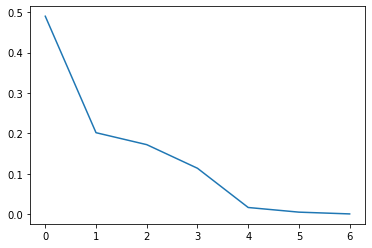

In [32]:
pca = PCA()
## Estimation, calcul des composantes principales
C = pca.fit(X).transform(X)
print(C)
print(C.shape)
## Décroissance de la variance expliquée
plt.plot(pca.explained_variance_ratio_)
plt.show()

Nous pouvons voir en analysant ce graphique que garder 2 composantes nous permet d'avoir autour de 70% d'information contenue dans les données. 


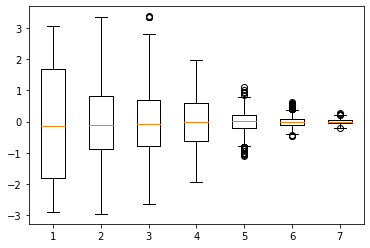

In [152]:
## distribution des composantes principales
plt.boxplot(C[:,0:20])
plt.show()

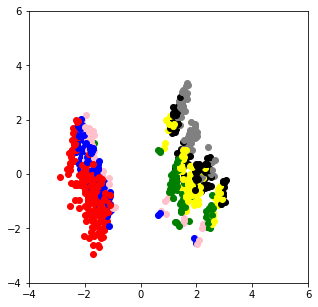

In [34]:
## Repésentation des individus
plt.figure(figsize=(5,5))
for i, j, nom in zip(C[:,0], C[:,1], df1["Energy.efficiency"]):
    if nom == "A" :
        color = "red"
    elif nom =="B" :
        color = "blue"
    elif nom =="C" :
        color = "pink"
    elif nom =="D" :
        color = "green"
    elif nom=="E" :
        color ="yellow"
    elif nom=="F" :
        color ="black"
    else : color="grey"
    plt.plot(i, j, "o",color=color)
plt.axis((-4,6,-4,6))  
plt.show()

On observe clairement que deux groupes de classe se distingue (A,B, C et D, E, F). On observe que quelques éléments de C se retourve dans le second groupe.

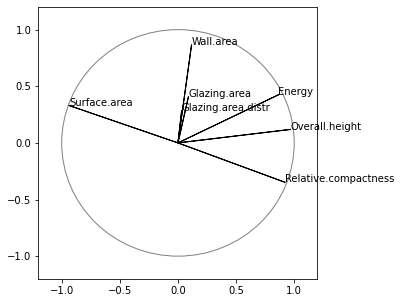

In [35]:
## coordonnées et représentation des variables
coord1=pca.components_[0]*np.sqrt(pca.explained_variance_[0])
coord2=pca.components_[1]*np.sqrt(pca.explained_variance_[1])
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(1, 1, 1)
for i, j, nom in zip(coord1,coord2, df1[["Relative.compactness","Wall.area","Surface.area","Overall.height","Glazing.area","Glazing.area.distr","Energy"]].columns):
    plt.text(i, j, nom)
    plt.arrow(0,0,i,j,color='black')
plt.axis((-1.2,1.2,-1.2,1.2))
# cercle
c=plt.Circle((0,0), radius=1, color='gray', fill=False)
ax.add_patch(c)
plt.show()

Nous pouvons voir que toutes les variables quantitatives sont très bien représentées sur le cercle de corrélation, exceptée *Glazing.area*. 

# Clustering avec 4 clusters

In [153]:
from sklearn.cluster  import  KMeans
from  sklearn.metrics  import confusion_matrix
clust=KMeans(n_clusters=4)
clust.fit(X)
classe=clust.labels_
print(classe)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 3 3 3 3 3 3 3 3 0 0 0 0 0 0 0 0 0 0 0 0 2
 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 3 3 3 3 3 3 3 3 0 0
 0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 3 3 3 3 3 3 3 3 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 3 3 3 3 3 3 3 3 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2 2
 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 3 3 3 3 3 3 3 3 0 0 0 0 0 0
 0 0 0 0 0 0 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 3 3 3
 3 3 3 3 3 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 3 3 3 3 3 3 3 3 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2 2 2 2
 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 3 3 3 3 3 3 3 3 0 0 0 0 0 0 0 0 0 0
 0 0 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 3 3 3 3 3 3 3
 3 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 3 3 3 3 3 3 3 3 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2 2 2 2 2 2 2 1
 1 1 1 1 1 1 1 1 1 1 1 1 

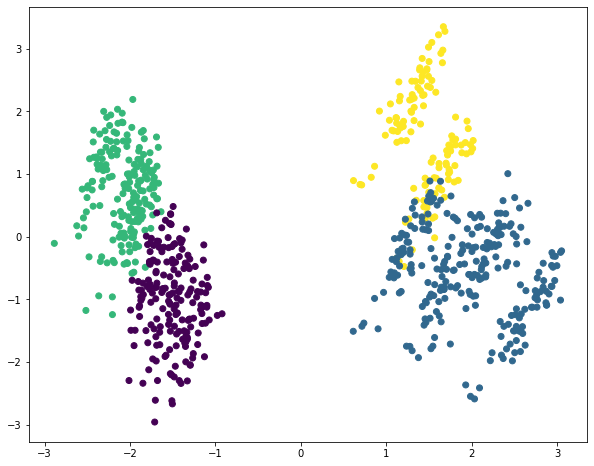

In [154]:
## Repésentation des individus dans les coordonnées de l'acp.
plt.figure(figsize=(10,8))
plt.scatter(C[:,0], C[:,1], c=classe) 
plt.show()

# Modélisation

In [38]:
df1.head()

Relative.compactness  Surface.area   Wall.area Overall.height orientation  \
0              0.982928    530.489958  306.484593            7.0       North   
1              0.983547    519.872380  299.776324            7.0        East   
2              0.979453    516.191221  303.374358            7.0       South   
3              0.977733    518.924089  292.812213            7.0        West   
4              0.903029    552.968920  316.236102            7.0       North   

   Glazing.area Glazing.area.distr     Energy Energy.efficiency  
0      0.016095                  0  34.263943                 B  
1      0.000000                  0  34.589751                 B  
2      0.000000                  0  38.778048                 C  
3      0.000010                  0  37.947808                 C  
4      0.000000                  0  47.675859                 D

In [39]:
# Variables explicatives
dfDum=pd.get_dummies(df1[["orientation"]])
print(dfDum)

dfQuant=df1[["Relative.compactness","Wall.area","Surface.area","Overall.height","Glazing.area", "Glazing.area.distr"]]
dfC=pd.concat([dfDum,dfQuant],axis=1)
dfC.head()

     orientation_East  orientation_North  orientation_South  orientation_West
0                   0                  1                  0                 0
1                   1                  0                  0                 0
2                   0                  0                  1                 0
3                   0                  0                  0                 1
4                   0                  1                  0                 0
..                ...                ...                ...               ...
763                 0                  0                  0                 1
764                 0                  1                  0                 0
765                 1                  0                  0                 0
766                 0                  0                  1                 0
767                 0                  0                  0                 1

[768 rows x 4 columns]


orientation_East  orientation_North  orientation_South  orientation_West  \
0                 0                  1                  0                 0   
1                 1                  0                  0                 0   
2                 0                  0                  1                 0   
3                 0                  0                  0                 1   
4                 0                  1                  0                 0   

   Relative.compactness   Wall.area  Surface.area Overall.height  \
0              0.982928  306.484593    530.489958            7.0   
1              0.983547  299.776324    519.872380            7.0   
2              0.979453  303.374358    516.191221            7.0   
3              0.977733  292.812213    518.924089            7.0   
4              0.903029  316.236102    552.968920            7.0   

   Glazing.area Glazing.area.distr  
0      0.016095                  0  
1      0.000000                  0  
2      0.000000                  0  
3      0.000010                  0  
4      0.000000                  0

In [40]:
Yc=df1["Energy.efficiency"]
#variable à expliquer pour la classification

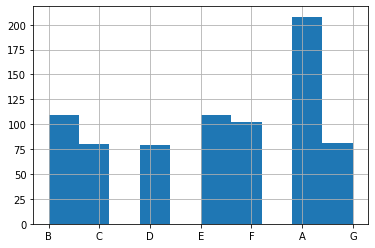

In [41]:
Yc.hist()
plt.show()

In [42]:
Yr=df1["Energy"]
#variable à expliquer pour la régression

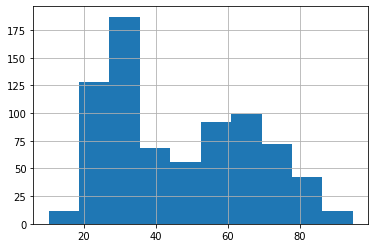

In [43]:
Yr.hist()
plt.show()

In [44]:
#Classification
from sklearn.model_selection import train_test_split  
Xc_train,Xc_test,Yc_train,Yc_test=train_test_split(dfC,Yc,test_size=0.2,random_state=11)

In [45]:
#Régression
from sklearn.model_selection import train_test_split  
Xr_train,Xr_test,Yr_train,Yr_test=train_test_split(dfC,Yr,test_size=0.2,random_state=11)

In [46]:
from sklearn.preprocessing import StandardScaler  
#une normalisation 
#des variables explicatives avec les commandes ci-dessous
scaler = StandardScaler()  
scaler.fit(Xc_train)  
Xc_train = scaler.transform(Xc_train)  
#Meme transformation sur le test
Xc_test = scaler.transform(Xc_test)

In [47]:
from sklearn.preprocessing import StandardScaler  
#une normalisation 
#des variables explicatives avec les commandes ci-dessous
scaler = StandardScaler()  
scaler.fit(Xr_train)  
Xr_train = scaler.transform(Xr_train)  
#Meme transformation sur le test
Xr_test = scaler.transform(Xr_test)

# Modèle linéaire

In [48]:
score_regression=[]
scrore_classification=[]
modele=[]

# Régression logistique pour prédire Energy.efficiency

In [49]:
from sklearn.linear_model import LogisticRegression

In [50]:
modele_logit = LogisticRegression(penalty='none',solver='newton-cg')
modele_logit.fit(Xc_train,Yc_train)

LogisticRegression(penalty='none', solver='newton-cg')

In [51]:
y_chap = modele_logit.predict(Xc_test)
table=pd.crosstab(y_chap,Yc_test)
print(table)

Energy.efficiency   A  B  C  D   E   F   G
row_0                                     
A                  39  9  1  0   0   0   0
B                   6  2  8  1   0   0   0
C                   2  4  5  0   0   0   0
D                   0  0  0  8   2   1   0
E                   0  0  0  5  12   5   4
F                   0  0  0  1   5  10   4
G                   0  0  0  1   3   3  13


In [52]:
from sklearn.metrics import classification_report
print(classification_report(Yc_test, y_chap))
# erreur sur l'échantillon test
1-modele_logit.score(Xc_test, Yc_test)

scrore_classification.append(1-modele_logit.score(Xc_test, Yc_test))
modele.append("Logistic regression")

              precision    recall  f1-score   support

           A       0.80      0.83      0.81        47
           B       0.12      0.13      0.12        15
           C       0.45      0.36      0.40        14
           D       0.73      0.50      0.59        16
           E       0.46      0.55      0.50        22
           F       0.50      0.53      0.51        19
           G       0.65      0.62      0.63        21

    accuracy                           0.58       154
   macro avg       0.53      0.50      0.51       154
weighted avg       0.59      0.58      0.58       154



 - Pénalisation L1 (Lasso)

In [53]:
# Optimisation du paramètre de pénalisation
# grille de valeurs
from sklearn.model_selection import GridSearchCV
param=[{"C":[1,1.2,1.5,1.7,2,3,4,10]}]
logit = GridSearchCV(LogisticRegression(penalty="l1",solver="liblinear"), param,cv=5,n_jobs=-1)
logitOpt=logit.fit(Xc_train, Yc_train)  # GridSearchCV est lui même un estimateur
# paramètre optimal
logitOpt.best_params_["C"]
print("Meilleur score = %f, Meilleur paramètre = %s" % (1.-logitOpt.best_score_,logitOpt.best_params_))

Meilleur score = 0.496828, Meilleur paramètre = {'C': 10}


In [54]:
# erreur sur l'échantillon test
1-logitOpt.score(Xc_test, Yc_test)
scrore_classification.append(1-logitOpt.score(Xc_test, Yc_test))
modele.append("Logistic regression avec pénalitée")

In [55]:
y_chap = logitOpt.predict(Xc_test)
table=pd.crosstab(y_chap,Yc_test)
print(table)

Energy.efficiency   A  B   C  D   E  F   G
row_0                                     
A                  40  9   1  0   0  0   0
B                   7  5  11  0   0  0   0
C                   0  1   0  0   0  0   0
D                   0  0   2  7   1  1   3
E                   0  0   0  7  14  6   2
F                   0  0   0  1   3  9   3
G                   0  0   0  1   4  3  13


In [56]:
from sklearn.metrics import classification_report
print(classification_report(Yc_test, y_chap))

              precision    recall  f1-score   support

           A       0.80      0.85      0.82        47
           B       0.22      0.33      0.26        15
           C       0.00      0.00      0.00        14
           D       0.50      0.44      0.47        16
           E       0.48      0.64      0.55        22
           F       0.56      0.47      0.51        19
           G       0.62      0.62      0.62        21

    accuracy                           0.57       154
   macro avg       0.45      0.48      0.46       154
weighted avg       0.54      0.57      0.55       154



# Régression linéaire appliquée pour prédire Energy puis Energy.efficiency

In [57]:
def threshold(prev) :
    a=len(prev)
    Yr_trainC=list(range(a,0,-1))
    i=0
    for y in (prev):   
        if y<30:
            Yr_trainC[i]="A"
        if y>=30 and y<35:
            Yr_trainC[i]="B"
        if y>=35 and y<45:
            Yr_trainC[i]="C"
        if y>=45 and y<55:
            Yr_trainC[i]="D"
        if y>=55 and y<65:
            Yr_trainC[i]="E"
        if y>=65 and y<75:
            Yr_trainC[i]="F"
        if y>=75:
            Yr_trainC[i]="G"
        i=i+1    
    y= np.asarray(Yr_trainC)
    return(y)

In [58]:
from sklearn.linear_model import LinearRegression

#créer un objet reg lin
modeleReg=LinearRegression()

modeleReg.fit(Xr_train,Yr_train)

LinearRegression()

In [59]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
prev=modeleReg.predict(Xr_test)
print("Perte=",1-modeleReg.score(Xr_test,Yr_test))
score_regression.append(1-modeleReg.score(Xr_test,Yr_test))
print("MSE=",mean_squared_error(prev,Yr_test))
print("R2=",r2_score(Yr_test,prev))

Perte= 0.1319947513135058
MSE= 57.108840710056775
R2= 0.8680052486864942


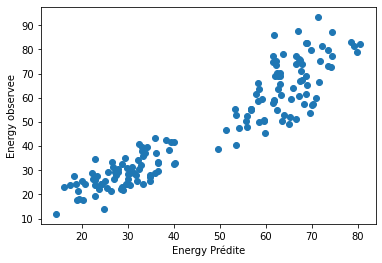

In [60]:
plt.plot(prev,Yr_test,"o")
plt.xlabel(u"Energy Prédite")
plt.ylabel("Energy observee")
plt.show()

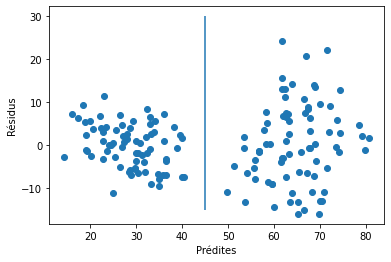

In [61]:
plt.plot(prev,Yr_test-prev,"o")
plt.xlabel(u"Prédites")
plt.ylabel(u"Résidus")
plt.vlines(45,-15,30)
plt.show()

In [62]:
table=pd.crosstab(y_chap,Yc_test)
print(table)

Energy.efficiency   A  B   C  D   E  F   G
row_0                                     
A                  40  9   1  0   0  0   0
B                   7  5  11  0   0  0   0
C                   0  1   0  0   0  0   0
D                   0  0   2  7   1  1   3
E                   0  0   0  7  14  6   2
F                   0  0   0  1   3  9   3
G                   0  0   0  1   4  3  13


In [63]:
from sklearn.metrics import classification_report
print(classification_report(Yc_test, y_chap))

              precision    recall  f1-score   support

           A       0.80      0.85      0.82        47
           B       0.22      0.33      0.26        15
           C       0.00      0.00      0.00        14
           D       0.50      0.44      0.47        16
           E       0.48      0.64      0.55        22
           F       0.56      0.47      0.51        19
           G       0.62      0.62      0.62        21

    accuracy                           0.57       154
   macro avg       0.45      0.48      0.46       154
weighted avg       0.54      0.57      0.55       154



- Pénalité de L1 (Lasso)

In [64]:
from sklearn import linear_model

from sklearn.model_selection import GridSearchCV
# grille de valeurs du paramètre alpha à optimiser
param=[{"alpha":[0.05,0.1,0.2,0.3,0.4,0.5,1]}]
regLasso = GridSearchCV(linear_model.Lasso(), param,cv=5,n_jobs=-1)
regLassOpt=regLasso.fit(Xr_train, Yr_train)
# paramètre optimal
regLassOpt.best_params_["alpha"]
print("Meilleur R2 = %f, Meilleur paramètre = %s" % (regLassOpt.best_score_,regLassOpt.best_params_))

Meilleur R2 = 0.871889, Meilleur paramètre = {'alpha': 0.05}


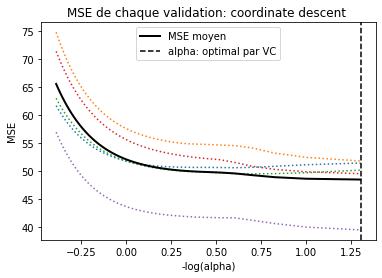

In [65]:
from sklearn.linear_model import LassoCV, LassoLarsCV
model = LassoCV(cv=5, alphas=np.array(range(1,50,1))/20.,n_jobs=-1,random_state=13).fit(Xr_train,Yr_train)
m_log_alphas = -np.log10(model.alphas_)

plt.figure()
# ymin, ymax = 2300, 3800
plt.plot(m_log_alphas, model.mse_path_, ':')
plt.plot(m_log_alphas, model.mse_path_.mean(axis=-1), 'k',
         label='MSE moyen', linewidth=2)
plt.axvline(-np.log10(model.alpha_), linestyle='--', color='k',
            label='alpha: optimal par VC')

plt.legend()

plt.xlabel('-log(alpha)')
plt.ylabel('MSE')
plt.title('MSE de chaque validation: coordinate descent ')
plt.show()

Le alpha choisi par cross validation correspond bien au alpha déterminé sur le graphe.

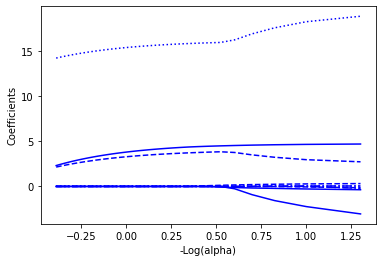

In [66]:
from itertools import cycle

from sklearn.linear_model import lasso_path
alphas_lasso, coefs_lasso, _ = lasso_path(Xr_train,Yr_train, alphas=np.array(range(1,50,1))/20.,)


plt.figure()
ax = plt.gca()

styles = cycle(['-', '--', '-.', ':'])

neg_log_alphas_lasso = -np.log10(alphas_lasso)
for coef_l, s in zip(coefs_lasso, styles):
    l1 = plt.plot(neg_log_alphas_lasso, coef_l, linestyle=s,c='b')
plt.xlabel('-Log(alpha)')
plt.ylabel('Coefficients')
plt.show()

Beaucoup de coefficients se superposent à 0. Nous en avons trois qui ont leurs coefficients qui évoluent quand -log(alpha) augmente.

In [67]:
from sklearn.metrics import r2_score
prev=regLassOpt.predict(Xr_test)
print("Perte=",1-regLassOpt.score(Xr_test,Yr_test))
score_regression.append(1-regLassOpt.score(Xr_test,Yr_test))
print("MSE=",mean_squared_error(prev,Yr_test))
print("R2=",r2_score(Yr_test,prev))

Perte= 0.132804535198784
MSE= 57.45920175436894
R2= 0.867195464801216


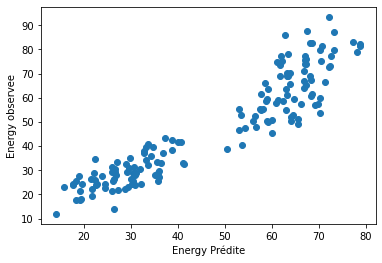

In [68]:
plt.plot(prev,Yr_test,"o")
plt.xlabel(u"Energy Prédite")
plt.ylabel("Energy observee")
plt.show()

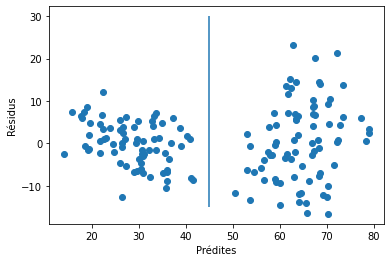

In [69]:
plt.plot(prev,Yr_test-prev,"o")
plt.xlabel(u"Prédites")
plt.ylabel(u"Résidus")
plt.vlines(45,-15,30)
plt.show()

In [70]:
y_chap=threshold(prev)
table=pd.crosstab(y_chap,Yc_test)
print(table)

Energy.efficiency   A  B  C   D   E   F   G
row_0                                      
A                  32  7  0   0   0   0   0
B                  10  4  6   0   0   0   0
C                   5  4  6   0   0   0   0
D                   0  0  2   3   1   0   0
E                   0  0  0  10  14   9   4
F                   0  0  0   3   7  10  13
G                   0  0  0   0   0   0   4


In [71]:
from sklearn.metrics import classification_report
print(classification_report(Yc_test, y_chap))

              precision    recall  f1-score   support

           A       0.82      0.68      0.74        47
           B       0.20      0.27      0.23        15
           C       0.40      0.43      0.41        14
           D       0.50      0.19      0.27        16
           E       0.38      0.64      0.47        22
           F       0.30      0.53      0.38        19
           G       1.00      0.19      0.32        21

    accuracy                           0.47       154
   macro avg       0.51      0.42      0.41       154
weighted avg       0.59      0.47      0.47       154



# Arbre de décision

- Classification

In [72]:
from sklearn.tree import DecisionTreeClassifier
# Optimisation de la profondeur de l'arbre
param=[{"max_depth":list(range(2,10))}]
tree= GridSearchCV(DecisionTreeClassifier(),param,cv=10,n_jobs=-1)
treeOpt=tree.fit(Xc_train, Yc_train)
# paramètre optimal
print("Meilleur score = %f, Meilleur paramètre = %s" % (1. - treeOpt.best_score_,treeOpt.best_params_))

Meilleur score = 0.395796, Meilleur paramètre = {'max_depth': 6}


In [73]:
1-treeOpt.score(Xc_test,Yc_test)
scrore_classification.append(1-treeOpt.score(Xc_test,Yc_test))
modele.append("Arbre de décision")

In [74]:
# prévision de l'échantillon test
y_chap = treeOpt.predict(Xc_test)
# matrice de confusion
table=pd.crosstab(y_chap,Yc_test)
print(table)

Energy.efficiency   A  B  C  D   E  F   G
row_0                                    
A                  37  6  2  0   0  0   0
B                  10  5  4  0   0  0   0
C                   0  4  8  3   1  0   0
D                   0  0  0  9   2  0   0
E                   0  0  0  3  13  7   1
F                   0  0  0  1   6  9   6
G                   0  0  0  0   0  3  14


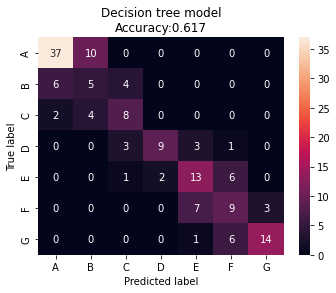

In [75]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix, precision_recall_fscore_support
import seaborn  as sbrn 
# pour mettre en place des graphiques / pyplot c 'est le module dédiée 
import matplotlib.pyplot as mtpl

# on crée la matrice de confusion 
mat_conf = confusion_matrix(Yc_test, y_chap) 

# on transforme cette matrice de confusion en data frame 
mat_conf_df = pd.DataFrame(mat_conf,
                     index = ['A','B','C','D','E', 'F', 'G'], 
                     columns = ['A','B','C','D','E', 'F', 'G'])

mtpl.figure(figsize=(5.5,4))
sbrn.heatmap(mat_conf_df, annot=True)
mtpl.title('Decision tree model\nAccuracy:{0:.3f}'.format(accuracy_score(Yc_test, y_chap)))
mtpl.ylabel('True label')
mtpl.xlabel('Predicted label')
mtpl.show()

- Régression

In [76]:
from sklearn.tree import DecisionTreeRegressor
# Optimisation de la profondeur de l'arbre
param=[{"max_depth":list(range(2,10))}]
tree= GridSearchCV(DecisionTreeRegressor(),param,cv=10,n_jobs=-1)
treeOpt=tree.fit(Xr_train, Yr_train)
# paramètre optimal
print("Meilleur score = %f, Meilleur parametre = %s" % (1. - treeOpt.best_score_,treeOpt.best_params_))

Meilleur score = 0.073386, Meilleur parametre = {'max_depth': 6}


In [77]:
1-treeOpt.score(Xr_test,Yr_test)
score_regression.append(1-treeOpt.score(Xr_test,Yr_test))

In [78]:
# prévision de l'échantillon test
y_chap = treeOpt.predict(Xr_test)

In [79]:
# Erreur quadratique moyenne
from sklearn.metrics import mean_squared_error
error_tree = mean_squared_error(Yr_test, y_chap)
print("R2=",r2_score(Yr_test,prev))
print("MSE=",error_tree)

R2= 0.867195464801216
MSE= 33.219420028985766


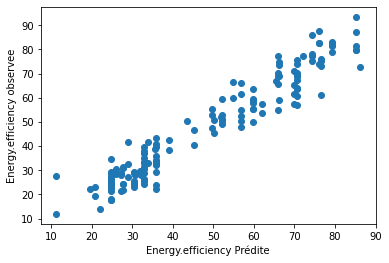

In [80]:
plt.plot(y_chap,Yr_test,"o")
plt.xlabel(u"Energy.efficiency Prédite")
plt.ylabel("Energy.efficiency observee")
plt.show()

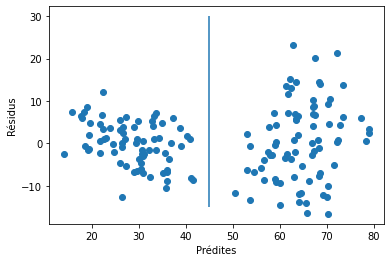

In [81]:
plt.plot(prev,Yr_test-prev,"o")
plt.xlabel(u"Prédites")
plt.ylabel(u"Résidus")
plt.vlines(45,-15,30)
plt.show()

In [82]:
y_chap=threshold(prev)
table=pd.crosstab(y_chap,Yc_test)
print(table)

Energy.efficiency   A  B  C   D   E   F   G
row_0                                      
A                  32  7  0   0   0   0   0
B                  10  4  6   0   0   0   0
C                   5  4  6   0   0   0   0
D                   0  0  2   3   1   0   0
E                   0  0  0  10  14   9   4
F                   0  0  0   3   7  10  13
G                   0  0  0   0   0   0   4


In [83]:
print(classification_report(Yc_test, y_chap))

              precision    recall  f1-score   support

           A       0.82      0.68      0.74        47
           B       0.20      0.27      0.23        15
           C       0.40      0.43      0.41        14
           D       0.50      0.19      0.27        16
           E       0.38      0.64      0.47        22
           F       0.30      0.53      0.38        19
           G       1.00      0.19      0.32        21

    accuracy                           0.47       154
   macro avg       0.51      0.42      0.41       154
weighted avg       0.59      0.47      0.47       154



# Random Forest

- Classification

In [84]:
from sklearn.ensemble import RandomForestClassifier 
forest = RandomForestClassifier(random_state=42)

In [85]:
import time
np.random.seed(42)
start = time.time()

param_dist = {'max_depth': [2, 3, 4,5,6,7,8,9,10],
              'bootstrap': [True, False],
              'max_features': ['auto', 'sqrt', 'log2', None],
              'criterion': ['gini', 'entropy']}
# CV : 10 cross validation 
# 3 job en // 
# les parametre du dictioannire qu'il va étudier
# forest c 'est l'instation de la méthode RandomForestRegression plus haut qu'on lui passe en entrée pour qu'il sache sur quel 
# algo il prépare ces params
cv_rf = GridSearchCV(forest, cv = 10,
                     param_grid=param_dist, 
                     n_jobs = 3)

rf=cv_rf.fit(Xc_train, Yc_train)
print('Best Parameters using grid search: \n', 
      cv_rf.best_params_)
end = time.time()
print('Time taken in grid search: {0: .2f}'.format(end - start))

Best Parameters using grid search: 
 {'bootstrap': False, 'criterion': 'entropy', 'max_depth': 6, 'max_features': 'auto'}
Time taken in grid search:  312.12


In [86]:
# erreur de prévision sur le test
scrore_classification.append(1-rf.score(Xc_test,Yc_test))
modele.append("Foret aléatoires")
1-rf.score(Xc_test,Yc_test)

0.35064935064935066

In [87]:
# prévision
y_chap = rf.predict(Xc_test)
# matrice de confusion
table=pd.crosstab(y_chap,Yc_test)
print(table)

Energy.efficiency   A  B   C   D   E  F   G
row_0                                      
A                  38  6   1   0   0  0   0
B                   9  5   3   0   0  0   0
C                   0  4  10   0   0  0   0
D                   0  0   0  10   2  0   0
E                   0  0   0   5  13  7   0
F                   0  0   0   1   7  9   6
G                   0  0   0   0   0  3  15


In [88]:
rf2= RandomForestClassifier(n_estimators=100,max_features=2)
rfFit=rf2.fit(Xc_train, Yc_train)
# Importance décroissante des variables
importances = rfFit.feature_importances_
indices = np.argsort(importances)[::-1]
for f in range(Xc_train.shape[1]):
    print(dfC.columns[indices[f]], importances[indices[f]])

Surface.area 0.22048787052630636
Relative.compactness 0.2149276449397507
Glazing.area 0.1952226568378644
Wall.area 0.17078221506761365
Glazing.area.distr 0.08275302916526557
Overall.height 0.06843165434599792
orientation_South 0.012746702925712755
orientation_East 0.011587370172878038
orientation_North 0.011535295201502593
orientation_West 0.011525560817108106


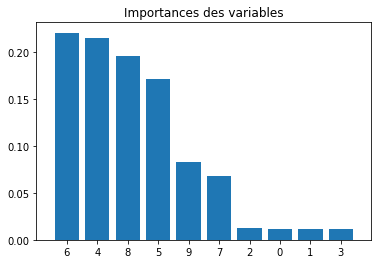

In [89]:
# Graphe des importances
plt.figure()
plt.title("Importances des variables")
plt.bar(range(Xc_train.shape[1]), importances[indices])
plt.xticks(range(Xc_train.shape[1]), indices)
plt.xlim([-1, Xc_train.shape[1]])
plt.show()

- Régression

In [90]:
from sklearn.ensemble import RandomForestRegressor  
forest = RandomForestRegressor()

In [91]:
import time
np.random.seed(42)
start = time.time()

param_dist = {'max_depth': [2, 3, 4, 5,6,7,8,9,10],
              'bootstrap': [True, False],
              'max_features': ['auto', 'sqrt', 'log2', None],
              'criterion': ['mse', 'mae']}

cv_rf = GridSearchCV(forest, cv = 10,
                     param_grid=param_dist, 
                     n_jobs = 3)

rf=cv_rf.fit(Xr_train, Yr_train)
print('Best Parameters using grid search: \n', 
      cv_rf.best_params_)
end = time.time()
print('Time taken in grid search: {0: .2f}'.format(end - start))

Best Parameters using grid search: 
 {'bootstrap': True, 'criterion': 'mae', 'max_depth': 9, 'max_features': 'auto'}
Time taken in grid search:  646.51


In [92]:
1-rf.score(Xr_test,Yr_test)
score_regression.append(1-rf.score(Xr_test,Yr_test))

In [93]:
# prévision
y_chap = rf.predict(Xr_test)

In [94]:
# Erreur quadratique moyenne
from sklearn.metrics import mean_squared_error
error_tree = mean_squared_error(Yr_test, y_chap)
print("R2=",r2_score(Yr_test,prev))
print("MSE=",error_tree)

R2= 0.867195464801216
MSE= 27.613616787486524


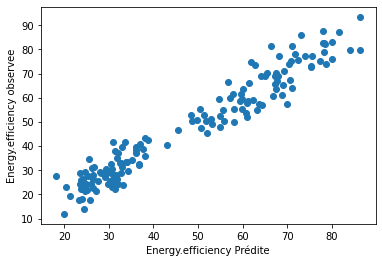

In [95]:
plt.plot(y_chap,Yr_test,"o")
plt.xlabel(u"Energy.efficiency Prédite")
plt.ylabel("Energy.efficiency observee")
plt.show()

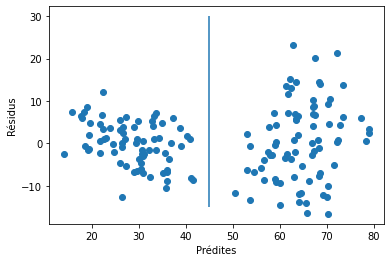

In [96]:
plt.plot(prev,Yr_test-prev,"o")
plt.xlabel(u"Prédites")
plt.ylabel(u"Résidus")
plt.vlines(45,-15,30)
plt.show()

In [97]:
y_chap=threshold(prev)
table=pd.crosstab(y_chap,Yc_test)
print(table)

Energy.efficiency   A  B  C   D   E   F   G
row_0                                      
A                  32  7  0   0   0   0   0
B                  10  4  6   0   0   0   0
C                   5  4  6   0   0   0   0
D                   0  0  2   3   1   0   0
E                   0  0  0  10  14   9   4
F                   0  0  0   3   7  10  13
G                   0  0  0   0   0   0   4


In [98]:
print(classification_report(Yc_test, y_chap))

              precision    recall  f1-score   support

           A       0.82      0.68      0.74        47
           B       0.20      0.27      0.23        15
           C       0.40      0.43      0.41        14
           D       0.50      0.19      0.27        16
           E       0.38      0.64      0.47        22
           F       0.30      0.53      0.38        19
           G       1.00      0.19      0.32        21

    accuracy                           0.47       154
   macro avg       0.51      0.42      0.41       154
weighted avg       0.59      0.47      0.47       154



# Boosting

- Classification

In [99]:
from sklearn.ensemble import GradientBoostingClassifier

In [100]:
tps0=time.perf_counter()
param=[{"n_estimators":[100, 150,200, 250, 300]}]
gbm= GridSearchCV(GradientBoostingClassifier(),param,cv=10)
gbmOpt=gbm.fit(Xc_train, Yc_train)
# paramètre optimal
tps1=(time.perf_counter()-tps0)
print("Temps boosting = %f, Meilleur taux = %f, Meilleur paramètre = %s" % (tps1,
                        1. - gbmOpt.best_score_,gbmOpt.best_params_))

Temps boosting = 260.289107, Meilleur taux = 0.431597, Meilleur paramètre = {'n_estimators': 100}


In [101]:
# erreur de prévision sur le test
modele.append("Boosting")
scrore_classification.append(1-gbmOpt.score(Xc_test,Yc_test))
1-gbmOpt.score(Xc_test,Yc_test)

0.38961038961038963

In [102]:
# prévision de l'échantillon test
y_chap = gbmOpt.predict(Xc_test)
# matrice de confusion
table=pd.crosstab(y_chap,Yc_test)
print(table)

Energy.efficiency   A  B   C   D   E  F   G
row_0                                      
A                  34  5   1   0   0  0   0
B                  12  6   3   0   0  0   0
C                   0  4  10   0   0  0   0
D                   1  0   0  11   5  1   0
E                   0  0   0   4  11  7   0
F                   0  0   0   1   6  9   8
G                   0  0   0   0   0  2  13


In [103]:
print(classification_report(Yc_test, y_chap))

              precision    recall  f1-score   support

           A       0.85      0.72      0.78        47
           B       0.29      0.40      0.33        15
           C       0.71      0.71      0.71        14
           D       0.61      0.69      0.65        16
           E       0.50      0.50      0.50        22
           F       0.38      0.47      0.42        19
           G       0.87      0.62      0.72        21

    accuracy                           0.61       154
   macro avg       0.60      0.59      0.59       154
weighted avg       0.65      0.61      0.62       154



- Régression

In [104]:
from sklearn.ensemble import GradientBoostingRegressor

In [105]:
tps0=time.perf_counter()
param=[{"n_estimators":[100, 150,200, 250, 300]}]
gbm= GridSearchCV(GradientBoostingRegressor(),param,cv=10)
gbmOpt=gbm.fit(Xr_train, Yr_train)
# paramètre optimal
tps1=(time.perf_counter()-tps0)
print("Temps boosting = %f, Meilleur taux = %f, Meilleur paramètre = %s" % (tps1,
                        1. - gbmOpt.best_score_,gbmOpt.best_params_))

Temps boosting = 22.618248, Meilleur taux = 0.052831, Meilleur paramètre = {'n_estimators': 100}


In [106]:
1-gbmOpt.score(Xr_test,Yr_test)
score_regression.append(1-gbmOpt.score(Xr_test,Yr_test))

In [107]:
# prévision
y_chap = gbmOpt.predict(Xr_test)

In [108]:
# Erreur quadratique moyenne
from sklearn.metrics import mean_squared_error
error_tree = mean_squared_error(Yr_test, y_chap)
print("R2=",r2_score(Yr_test,prev))
print("MSE=",error_tree)

R2= 0.867195464801216
MSE= 25.193468382801502


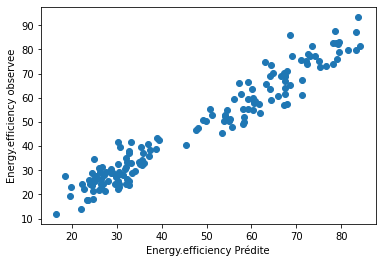

In [109]:
plt.plot(y_chap,Yr_test,"o")
plt.xlabel(u"Energy.efficiency Prédite")
plt.ylabel("Energy.efficiency observee")
plt.show()

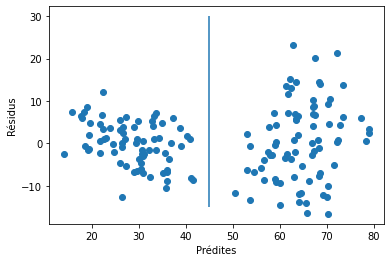

In [110]:
plt.plot(prev,Yr_test-prev,"o")
plt.xlabel(u"Prédites")
plt.ylabel(u"Résidus")
plt.vlines(45,-15,30)
plt.show()

In [111]:
y_chap=threshold(prev)
table=pd.crosstab(y_chap,Yc_test)
print(table)

Energy.efficiency   A  B  C   D   E   F   G
row_0                                      
A                  32  7  0   0   0   0   0
B                  10  4  6   0   0   0   0
C                   5  4  6   0   0   0   0
D                   0  0  2   3   1   0   0
E                   0  0  0  10  14   9   4
F                   0  0  0   3   7  10  13
G                   0  0  0   0   0   0   4


In [112]:
print(classification_report(Yc_test, y_chap))

              precision    recall  f1-score   support

           A       0.82      0.68      0.74        47
           B       0.20      0.27      0.23        15
           C       0.40      0.43      0.41        14
           D       0.50      0.19      0.27        16
           E       0.38      0.64      0.47        22
           F       0.30      0.53      0.38        19
           G       1.00      0.19      0.32        21

    accuracy                           0.47       154
   macro avg       0.51      0.42      0.41       154
weighted avg       0.59      0.47      0.47       154



# SVM

- Classification

In [113]:
from sklearn.svm import SVC

In [114]:
SVM = SVC(kernel='rbf')

In [115]:
import time
np.random.seed(42)
start = time.time()

param_dist = {'C': [1.0, 2.0, 3.0, 4.0],
              'degree': [1, 2, 3, None],
              'gamma': ['scale', 'auto']}
# CV : 10 cross validation 
# 3 job en // 
# les parametre du dictioannire qu'il va étudier
# forest c 'est l'instation de la méthode RandomForestRegression plus haut qu'on lui passe en entrée pour qu'il sache sur quel 
# algo il prépare ces params
cv_rf = GridSearchCV(SVM, cv = 10,
                     param_grid=param_dist, 
                     n_jobs = 3)

cv=cv_rf.fit(Xc_train, Yc_train)
print('Best Parameters using grid search: \n', 
      cv_rf.best_params_)
end = time.time()
print('Time taken in grid search: {0: .2f}'.format(end - start))

Best Parameters using grid search: 
 {'C': 2.0, 'degree': 1, 'gamma': 'scale'}
Time taken in grid search:  3.16


In [116]:
1-cv.score(Xc_test,Yc_test)
modele.append("SVM")
scrore_classification.append(1-cv.score(Xc_test,Yc_test))

In [117]:
# prévision
y_chap = cv.predict(Xc_test)
# matrice de confusion
table=pd.crosstab(y_chap,Yc_test)
print(table)

Energy.efficiency   A  B  C  D   E  F   G
row_0                                    
A                  39  9  2  0   0  0   0
B                   7  3  6  0   0  0   0
C                   1  3  4  0   0  0   0
D                   0  0  2  8   3  0   2
E                   0  0  0  5  13  6   1
F                   0  0  0  2   4  9   4
G                   0  0  0  1   2  4  14


In [118]:
print(classification_report(Yc_test, y_chap))

              precision    recall  f1-score   support

           A       0.78      0.83      0.80        47
           B       0.19      0.20      0.19        15
           C       0.50      0.29      0.36        14
           D       0.53      0.50      0.52        16
           E       0.52      0.59      0.55        22
           F       0.47      0.47      0.47        19
           G       0.67      0.67      0.67        21

    accuracy                           0.58       154
   macro avg       0.52      0.51      0.51       154
weighted avg       0.58      0.58      0.58       154



- Regression

In [119]:
from sklearn.svm import SVR
from sklearn import preprocessing
from sklearn.pipeline import make_pipeline

In [120]:
SVR = SVR(kernel='poly')
import time
start = time.time()

param_dist = {'C': [1.0, 2.0, 3.0, 4.0],
              'degree': [1, 2, 3, None],
              'gamma': ['scale', 'auto']}
# CV : 10 cross validation 
# 3 job en // 
# les parametre du dictioannire qu'il va étudier

cv_rf = GridSearchCV(SVR, cv = 10,
                     param_grid=param_dist, 
                     n_jobs = 3)
regr = make_pipeline(StandardScaler(), cv_rf)

svr = regr.fit(Xr_train, Yr_train)
print('Best Parameters using grid search: \n', 
      cv_rf.best_params_)
end = time.time()
print('Time taken in grid search: {0: .2f}'.format(end - start))

Best Parameters using grid search: 
 {'C': 4.0, 'degree': 1, 'gamma': 'scale'}
Time taken in grid search:  3.41


In [121]:
print(1-svr.score(Xr_test,Yr_test))
score_regression.append(1-svr.score(Xr_test,Yr_test))

0.14495221134695313


In [122]:
y_chap = cv_rf.predict(Xr_test)

In [123]:
# Erreur quadratique moyenne
from sklearn.metrics import mean_squared_error
error_tree = mean_squared_error(Yr_test, y_chap)
print("R2=",r2_score(Yr_test,prev))
print("MSE=",error_tree)

R2= 0.867195464801216
MSE= 62.71501454419282


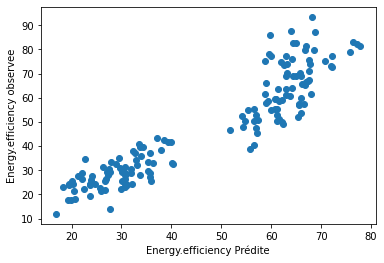

In [124]:
plt.plot(y_chap,Yr_test,"o")
plt.xlabel(u"Energy.efficiency Prédite")
plt.ylabel("Energy.efficiency observee")
plt.show()

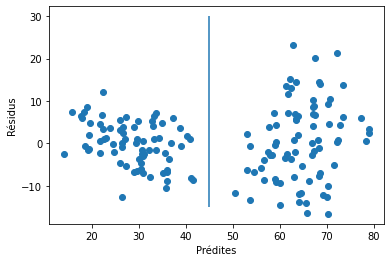

In [125]:
plt.plot(prev,Yr_test-prev,"o")
plt.xlabel(u"Prédites")
plt.ylabel(u"Résidus")
plt.vlines(45,-15,30)
plt.show()

In [126]:
y_chap=threshold(prev)
table=pd.crosstab(y_chap,Yc_test)
print(table)

Energy.efficiency   A  B  C   D   E   F   G
row_0                                      
A                  32  7  0   0   0   0   0
B                  10  4  6   0   0   0   0
C                   5  4  6   0   0   0   0
D                   0  0  2   3   1   0   0
E                   0  0  0  10  14   9   4
F                   0  0  0   3   7  10  13
G                   0  0  0   0   0   0   4


In [127]:
print(classification_report(Yc_test, y_chap))

              precision    recall  f1-score   support

           A       0.82      0.68      0.74        47
           B       0.20      0.27      0.23        15
           C       0.40      0.43      0.41        14
           D       0.50      0.19      0.27        16
           E       0.38      0.64      0.47        22
           F       0.30      0.53      0.38        19
           G       1.00      0.19      0.32        21

    accuracy                           0.47       154
   macro avg       0.51      0.42      0.41       154
weighted avg       0.59      0.47      0.47       154



# Comparaison des modèles

In [130]:
liste=[1,2,3,4,5,6]
df = pd.DataFrame({'Modele': modele, 'Score classification': scrore_classification, 'Score regression': score_regression},
                      index = liste)

In [131]:
print(df)

                               Modele  Score classification  Score regression
1                 Logistic regression              0.422078          0.131995
2  Logistic regression avec pénalitée              0.428571          0.132805
3                   Arbre de décision              0.383117          0.076780
4                    Foret aléatoires              0.350649          0.063823
5                            Boosting              0.389610          0.058229
6                                 SVM              0.415584          0.144952


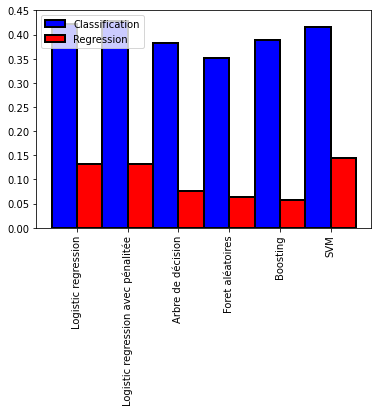

In [144]:
Categories= ["Classification", "Regression"]
largeur_barre = 0.5 # Largeur de chaque barre : 
x1 = range(len(modele)) # Position des barres de la catégorie 1
x2 = [i + largeur_barre for i in x1] # Position des barres de la cat 2
plt.bar(x1, scrore_classification, width = largeur_barre, color = 'blue', # Barres cat 1
           edgecolor = 'black', linewidth = 2)
plt.bar(x2, score_regression, width = largeur_barre, color = 'red', # Barres cat 2
           edgecolor = ['black' for i in scrore_classification], linewidth = 2)
plt.xticks([r + largeur_barre / 2 for r in range(len(scrore_classification))], # Etiquettes
              modele,  rotation='vertical')
plt.legend(Categories,loc=2)
plt.show()